# Analyzing the Raw data given wrt Black Friday Sales 

# Installing necessary libraries 

In [1]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the csv file 


In [3]:
df = pd.read_csv(r'C:\Users\Shubh\Desktop\PROJECTS\PYTHON\EDA _BlackFridaySales\Data\BlackFriday.csv') 

# Total number of rows and column
To find total number of rows and column, here we have stored csv file in "df" variable. If we execute this df we will get total rows and total columns 

Here total rows : 537577 rows
total colums : 12 columns

In [4]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


# Analyzing Dataframe (initial level)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


    Observation 1: Now here we can notice age datatype is object which should be int ; 
                   In  Product_Category_2 and Product_Category_3 there seems to be some null values as total rows is 537577;
                   rest all seems ok. 

In [6]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


    Identifying columns with missing values and decide how to handle them, such as imputing missing values or removing rows/columns with too many missing values.

# Handling Missing Value 
The df.isnull().sum() method in pandas is used to count the number of missing values (NaN) in each column of a DataFrame.
        
Here's a breakdown of how it works:

1) df.isnull() returns a DataFrame of the same shape as the original DataFrame (df), where each cell contains a boolean value indicating whether the corresponding cell in the original DataFrame is missing (True) or not (False).
2) sum() is then applied to this DataFrame, which sums up the boolean values along each column. Since in Python, True is treated as 1 and False as 0 when summed, this effectively counts the number of missing values in each column.

When we run df.isnull().sum(), we will get a Series object where each index corresponds to a column name in df, and each value indicates the number of missing values in that column.

In [7]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

    Observation2 : Product_Category_2 and Product_Category_3 have 166986 and 373299 missing values which are very huge so inorder to analyze the data we need to delete these two Product Category.

The dropna() method is commonly used in data preprocessing to remove rows or columns with missing data before analysis.
The df.dropna() method in pandas is used to remove rows or columns from a DataFrame that contain any missing values (NaN).

#Remove rows with any missing values
df_cleaned = df.dropna()

#Remove columns with any missing values
df_cleaned = df.dropna(axis=1)

#Remove rows with missing values in specific columns
df_cleaned = df.dropna(subset=['column1', 'column2'])

#Remove rows with at least 3 non-missing values
df_cleaned = df.dropna(thresh=3)


# Removing Missing Values in Rows and Column

In [8]:
df.dropna() 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...,...,...
537549,1004734,P00345842,M,51-55,1,B,1,1,2,8.0,14.0,13082
537551,1004735,P00313442,M,46-50,3,C,3,0,5,6.0,8.0,6863
537562,1004736,P00146742,M,18-25,20,A,1,1,1,13.0,14.0,11508
537571,1004737,P00221442,M,36-45,16,C,1,0,1,2.0,5.0,11852


Writing below 

del df['Product_Category_2']
del df['Product_Category_3']

or df.dropna(axis=1) will do one and the same thing as here we need to delete the entire column. 

In [9]:
df.dropna(axis=1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [10]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


# Step 2 : Now Lets Analyze the columns of the data 

In [11]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [12]:
df['User_ID'].nunique()

5891

In [13]:
df['Product_ID'].nunique()

3623

In [14]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [15]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [16]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [17]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [18]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [19]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [20]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [21]:
df['Purchase'].sum()/len(df['Purchase'])

9333.859852635065

In [22]:
for column in df.columns:
    print(column, ":" ,df[column].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Product_Category_2 : 17
Product_Category_3 : 15
Purchase : 17959


# Step3: Analyzing Gender 

In [23]:
# Create a DataFrame to hold unique counts of each column
unique_counts_df = pd.DataFrame({
    'Column': df.columns,
    'Unique Counts': [df[column].nunique() for column in df.columns]
})

# Display the unique counts DataFrame in tabular form
display(unique_counts_df)


,Column,Unique Counts
0,User_ID,5891
1,Product_ID,3623
2,Gender,2
3,Age,7
4,Occupation,21
5,City_Category,3
6,Stay_In_Current_City_Years,5
7,Marital_Status,2
8,Product_Category_1,18
9,Product_Category_2,17


   # Creating a pie chart to visualize the gender distribution in the DataFrame df. 

<Axes: ylabel='Ratio'>

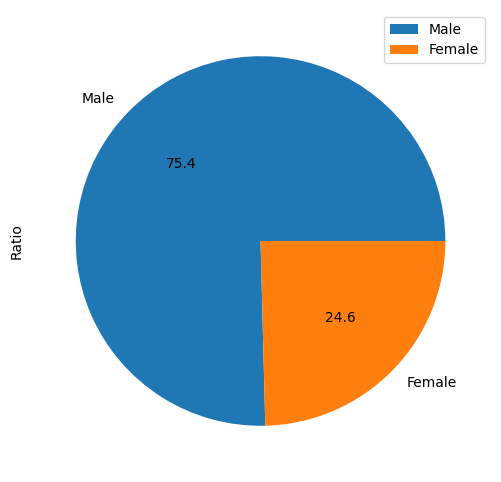

In [24]:
data = pd.DataFrame({'Ratio' : [len(df[df['Gender'] == 'M']), len(df[df['Gender'] == 'F'])]}, 
                    index = ['Male', 'Female'])

data.plot.pie(y = 'Ratio', figsize = (6,6), autopct = "%.1f")

<Axes: title={'center': 'Gender Ratio'}>

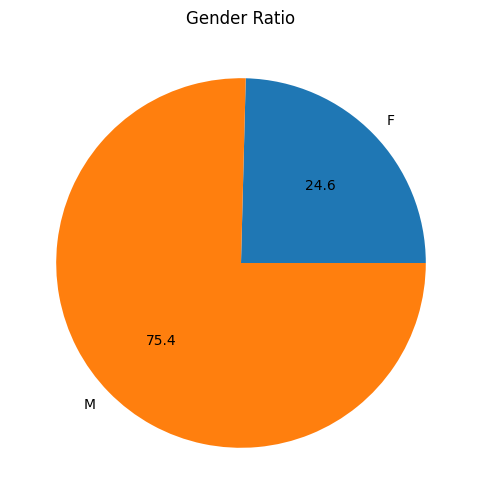

In [25]:
df.groupby('Gender').size().plot(kind = 'pie', 
                                 autopct = "%.1f",
                                 title = 'Gender Ratio',
                                 figsize = (6,6))

<Axes: xlabel='Gender'>

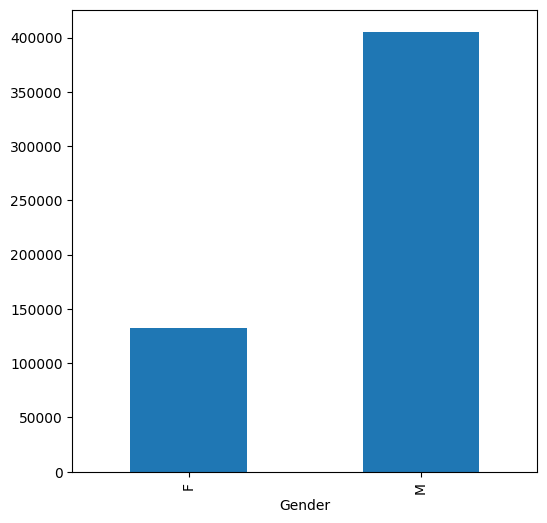

In [26]:
df.groupby('Gender').size().plot(kind = 'bar', 
                                 figsize = (6,6))

In [27]:
df.groupby('Gender').size()

Gender
F    132197
M    405380
dtype: int64

# Analyzing Age and Marital Status 

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

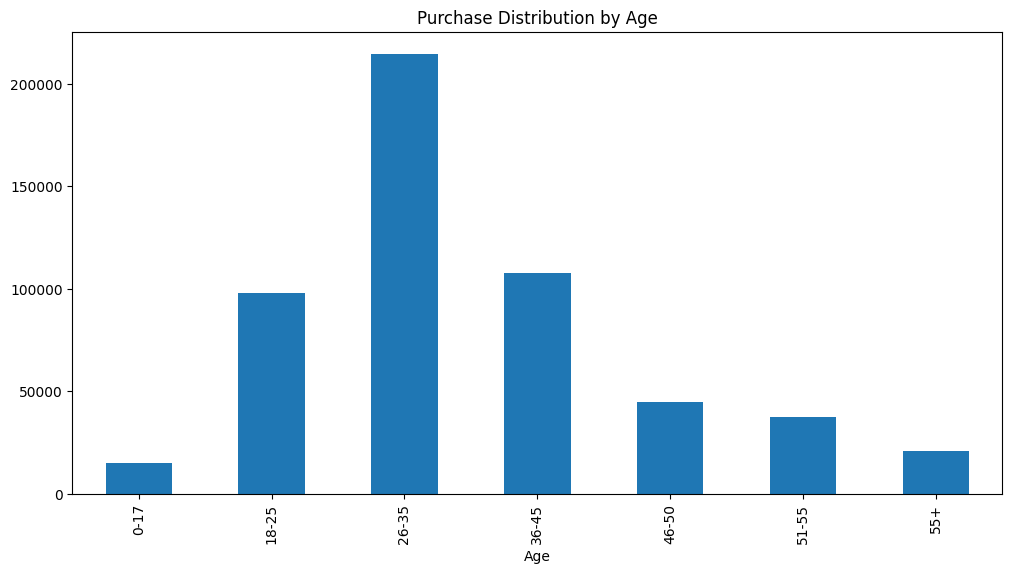

In [28]:
df.groupby('Age').size().plot(kind = 'bar', figsize = (12, 6), title = 'Purchase Distribution by Age')

In [29]:
lst = []
for i in df['Age'].unique():
    lst.append([i, df[df['Age'] == i]['Product_ID'].nunique()])
    
data = pd.DataFrame(lst , columns = ['Age','Products'])

<Axes: xlabel='Age'>

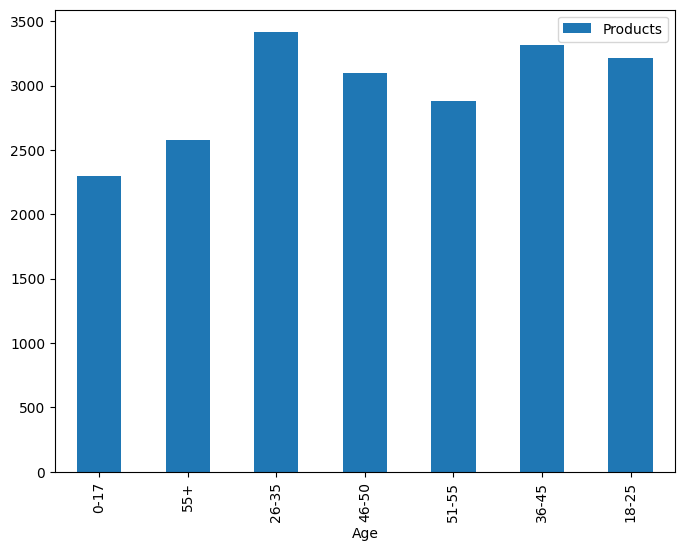

In [30]:
data.plot.bar(x = 'Age', figsize = (8,6))

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

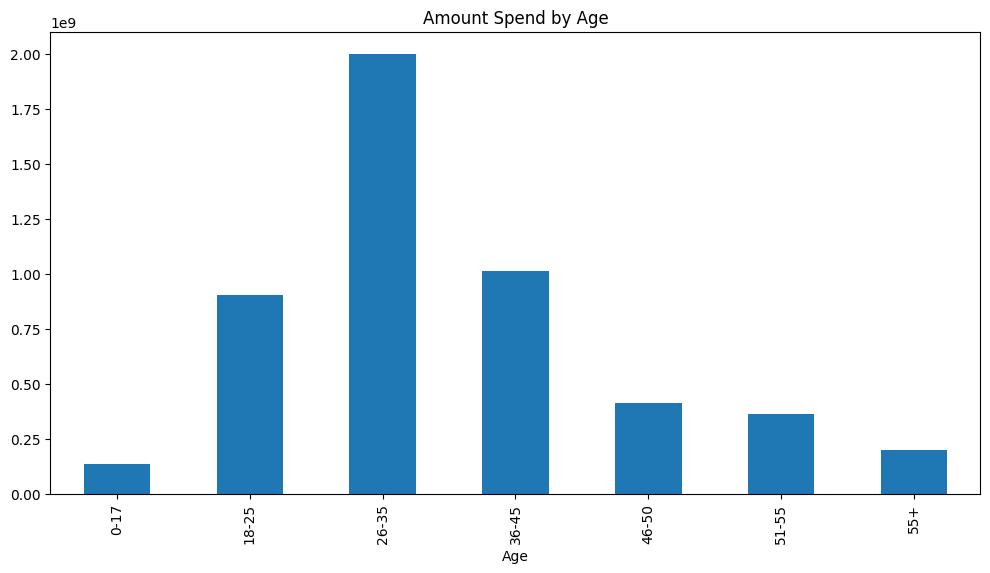

In [31]:
df.groupby('Age').sum()['Purchase'].plot(kind = 'bar', figsize = (12, 6), title = 'Amount Spend by Age')

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

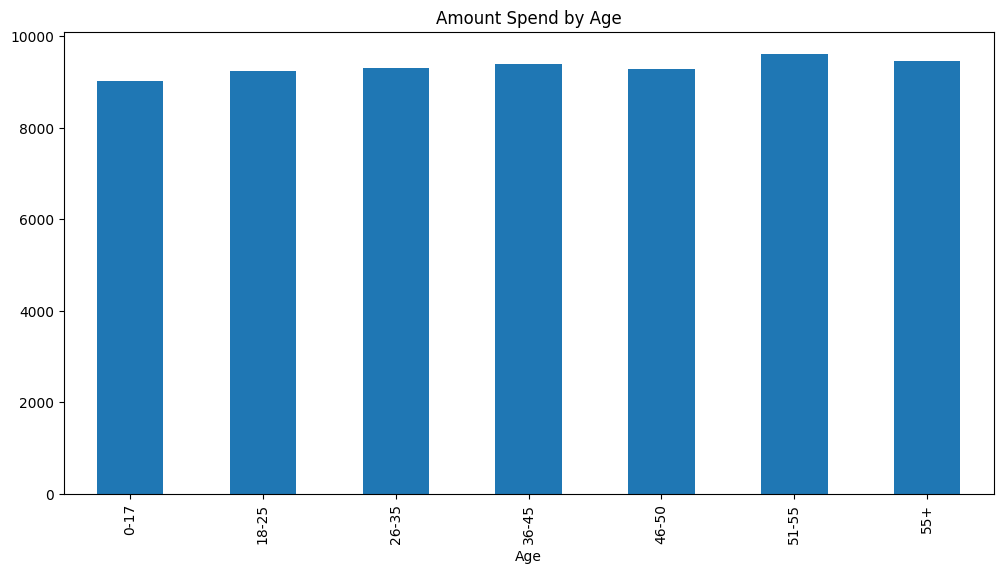

In [37]:
##df.groupby('Age').mean()['Purchase'].plot(kind = 'bar', figsize = (12, 6), title = 'Amount Spend by Age')

# Convert 'Purchase' column to numeric, coercing errors to NaN
df['Purchase'] = pd.to_numeric(df['Purchase'], errors='coerce')

# Drop rows with NaN values in 'Purchase' column
df.dropna(subset=['Purchase'], inplace=True)

# Now, try plotting again
df.groupby('Age')['Purchase'].mean().plot(kind='bar', figsize=(12, 6), title='Amount Spend by Age')


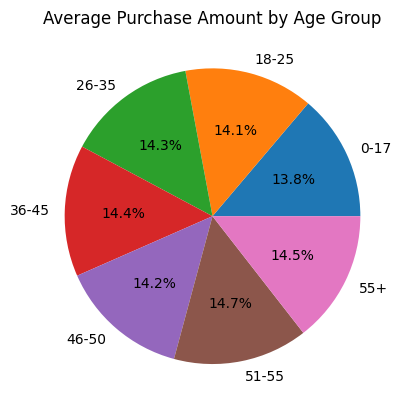

In [39]:
#df.groupby('Age').mean()['Purchase'].plot(kind = 'pie', autopct = '%0.1f')


# Group by 'Age' and calculate the mean purchase amount
mean_purchase_by_age = df.groupby('Age')['Purchase'].mean()

# Plot the pie chart
mean_purchase_by_age.plot(kind='pie', autopct='%0.1f%%')
plt.ylabel('')  # Remove the y-label
plt.title('Average Purchase Amount by Age Group')
plt.show()


<Axes: >

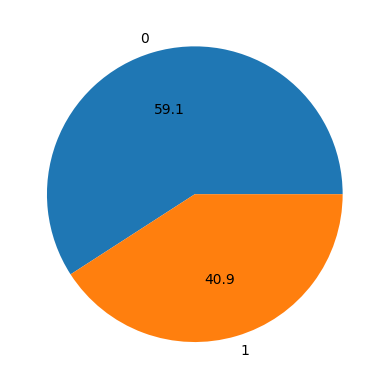

In [40]:
df.groupby('Marital_Status').size().plot(kind = 'pie', autopct = '%0.1f')

<Axes: >

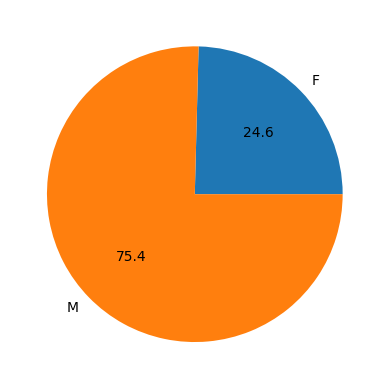

In [41]:
df.groupby('Gender').size().plot(kind = 'pie', autopct = '%0.1f')

# MultiColumn Analysis

In [42]:
import seaborn as sns

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

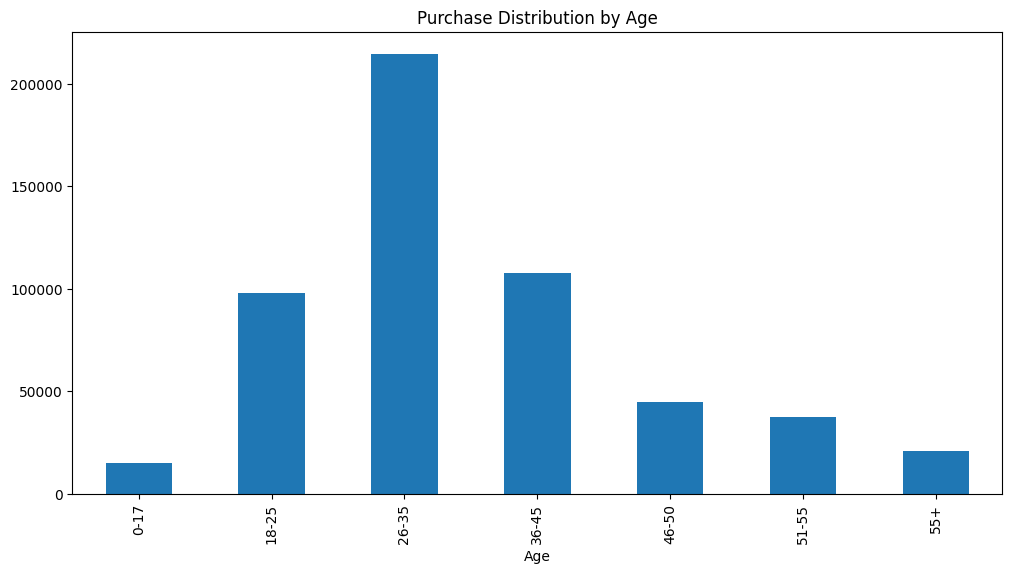

In [43]:
df.groupby('Age').size().plot(kind = 'bar', figsize = (12, 6), title = 'Purchase Distribution by Age')

<Axes: xlabel='Age', ylabel='count'>

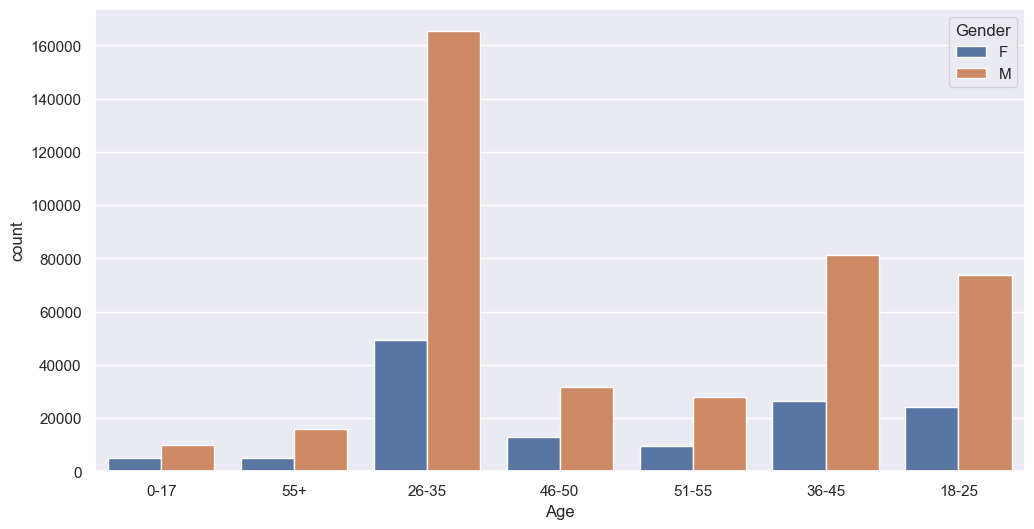

In [44]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = "Age", hue = 'Gender', data = df)

<Axes: xlabel='Gender', ylabel='count'>

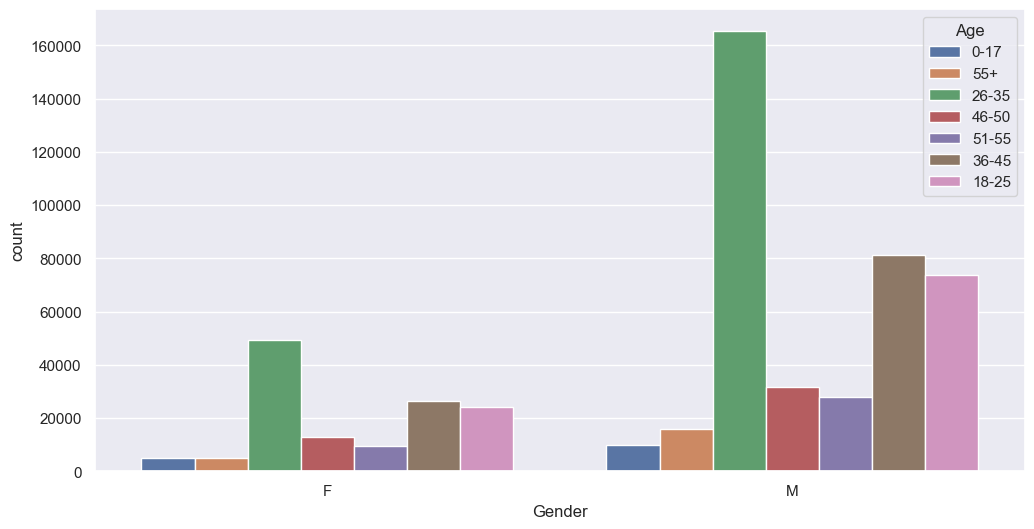

In [45]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = "Gender", hue = 'Age', data = df)

<Axes: xlabel='Marital_Status', ylabel='count'>

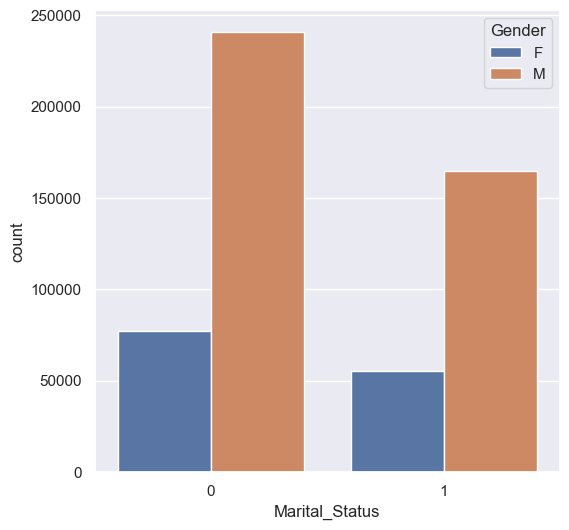

In [46]:
sns.set(rc = {'figure.figsize' : (6,6)})
sns.countplot(x = "Marital_Status", hue = 'Gender', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

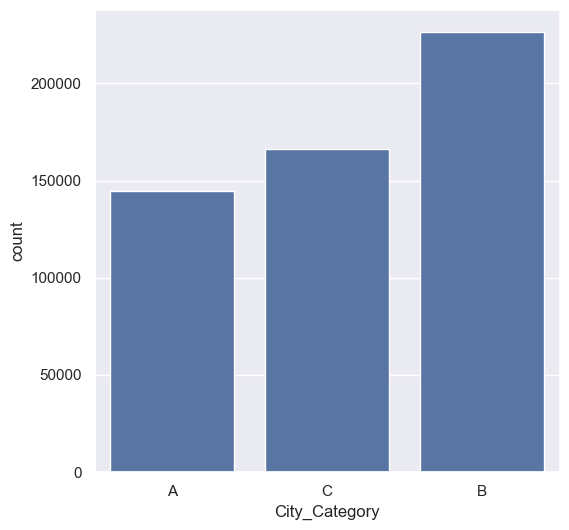

In [47]:
sns.countplot(x = df['City_Category'])

<Axes: xlabel='City_Category', ylabel='count'>

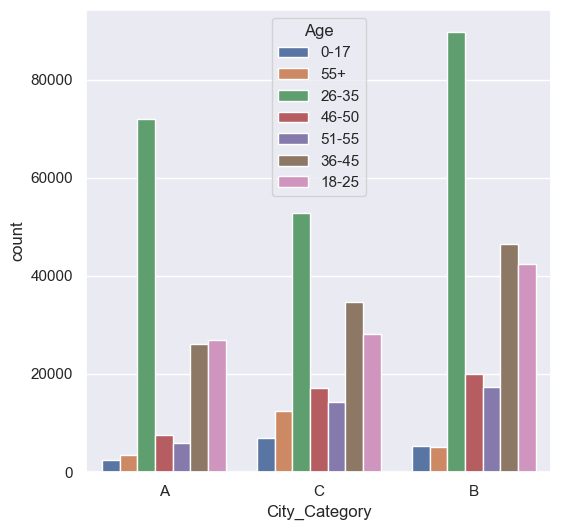

In [48]:
sns.countplot(x = 'City_Category', hue = 'Age', data = df)

<Axes: xlabel='Age', ylabel='count'>

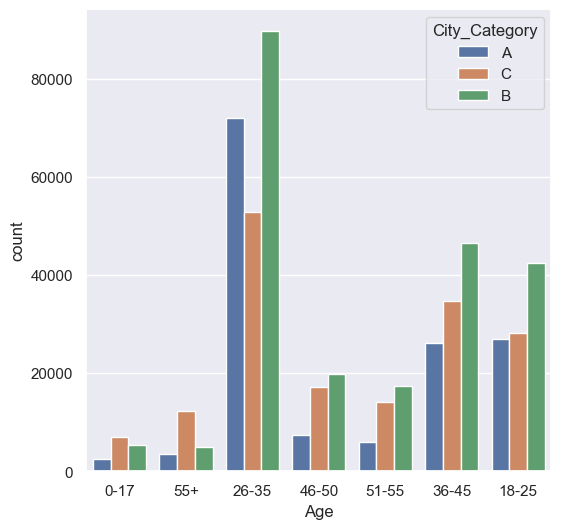

In [49]:
sns.countplot(x = 'Age', hue = 'City_Category', data = df)

<Axes: xlabel='Marital_Status', ylabel='count'>

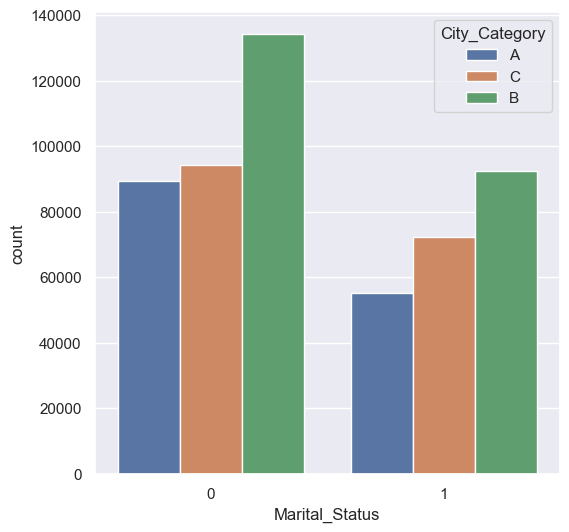

In [50]:
sns.countplot(x = 'Marital_Status', hue = 'City_Category', data = df)

<Axes: >

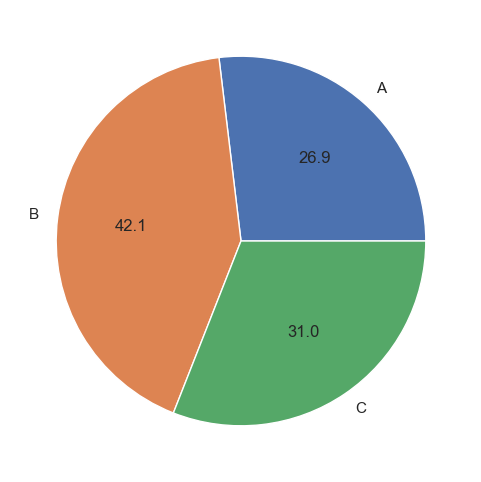

In [51]:
df.groupby('City_Category').size().plot(kind = 'pie', autopct = '%0.1f')

<Axes: xlabel='City_Category', ylabel='count'>

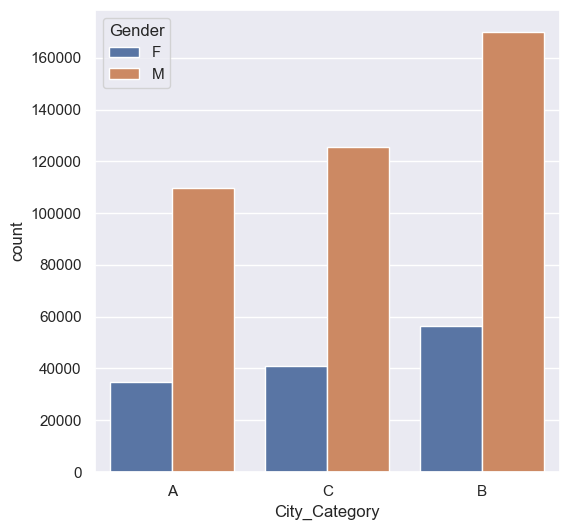

In [52]:
sns.countplot(x = 'City_Category', hue = 'Gender', data = df)

<Axes: ylabel='Purchase'>

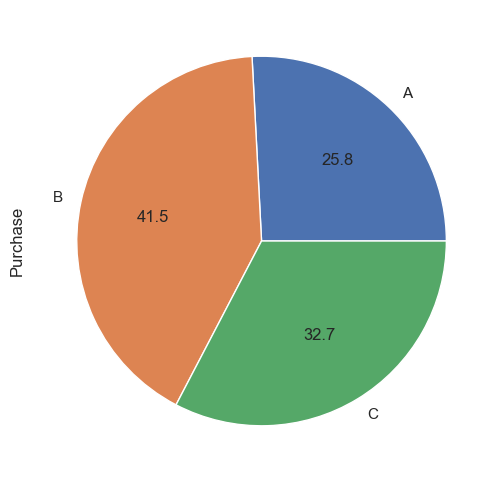

In [53]:
df.groupby('City_Category').sum()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")

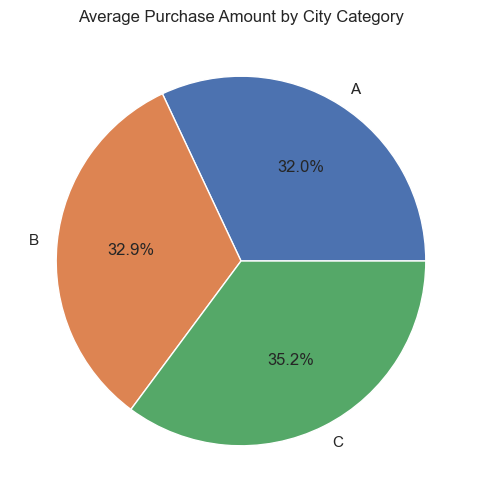

In [55]:
# Group by 'City_Category' and calculate the mean purchase amount
mean_purchase_by_city = df.groupby('City_Category')['Purchase'].mean()

# Plot the pie chart
mean_purchase_by_city.plot(kind='pie', autopct='%0.1f%%')
plt.ylabel('')  # Remove the y-label
plt.title('Average Purchase Amount by City Category')
plt.show()


# Occupation and Products Analysis

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

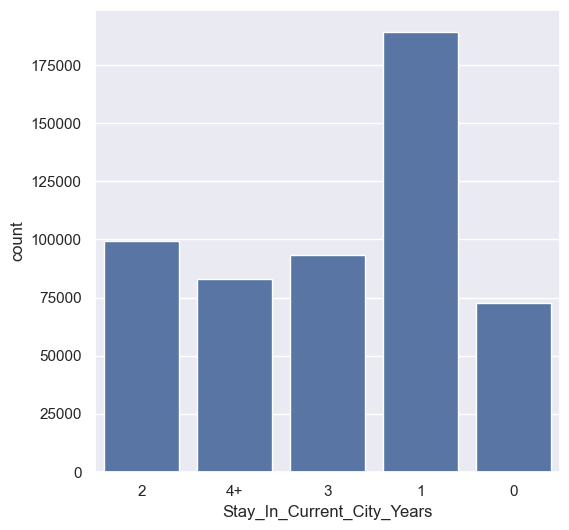

In [56]:
sns.countplot(x = df['Stay_In_Current_City_Years'])

<Axes: >

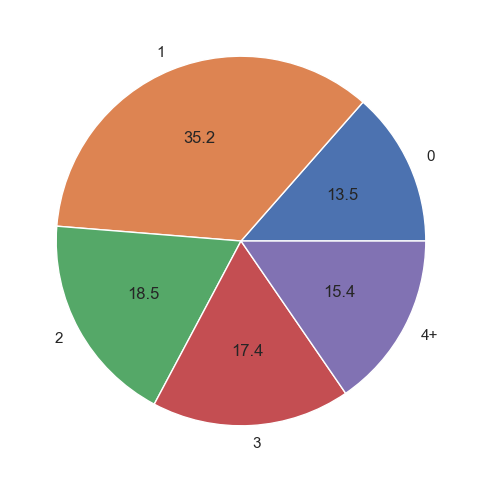

In [57]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind = 'pie', autopct = "%.1f")

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

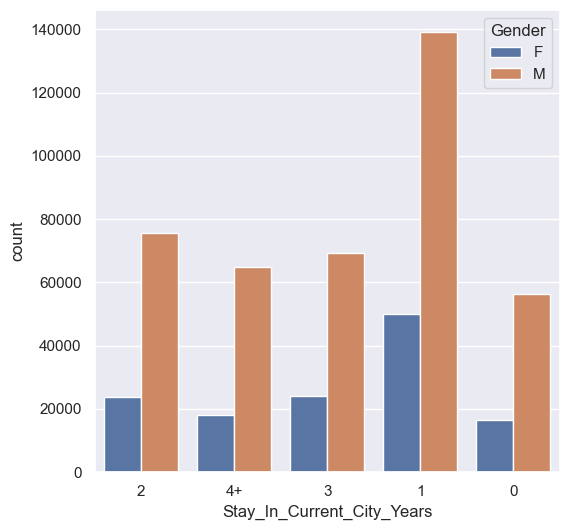

In [58]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Gender', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

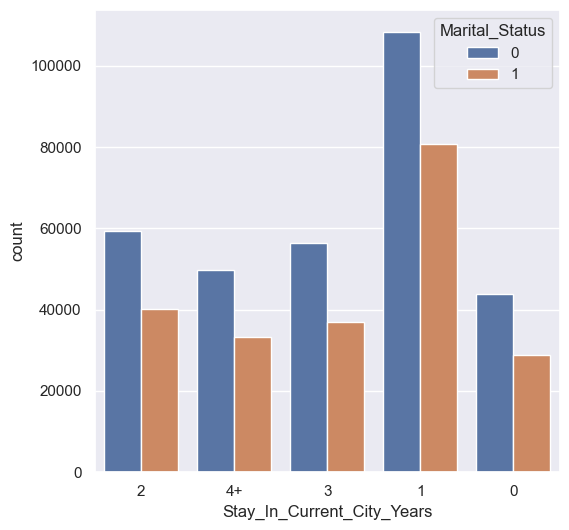

In [59]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Marital_Status', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

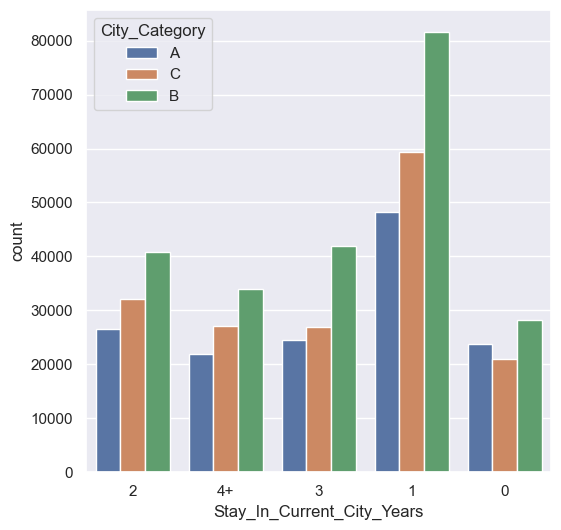

In [60]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'City_Category', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

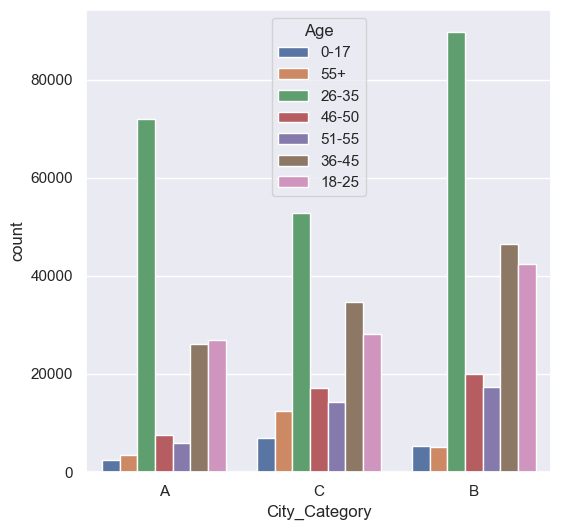

In [61]:
sns.countplot(x = 'City_Category', hue = 'Age',data = df)

<Axes: xlabel='Stay_In_Current_City_Years'>

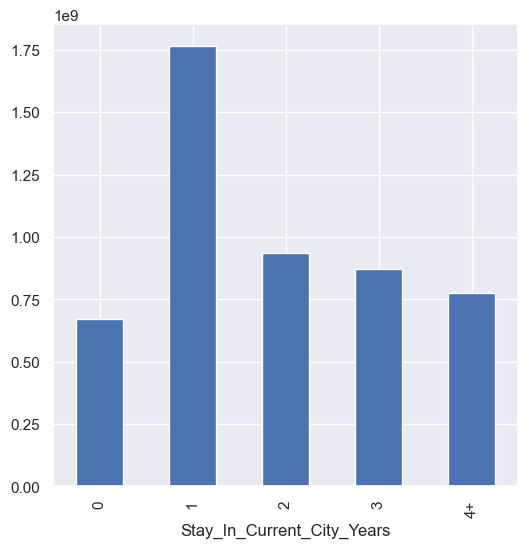

In [63]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind = 'bar') 

<Axes: xlabel='Occupation', ylabel='count'>

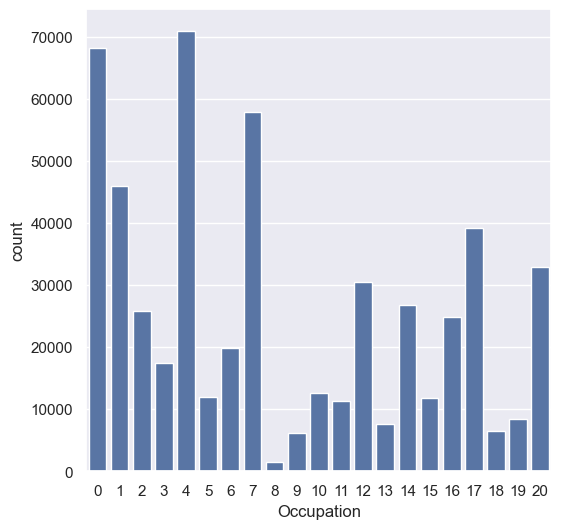

In [67]:
sns.countplot(x = df['Occupation'])

<Axes: xlabel='Occupation'>

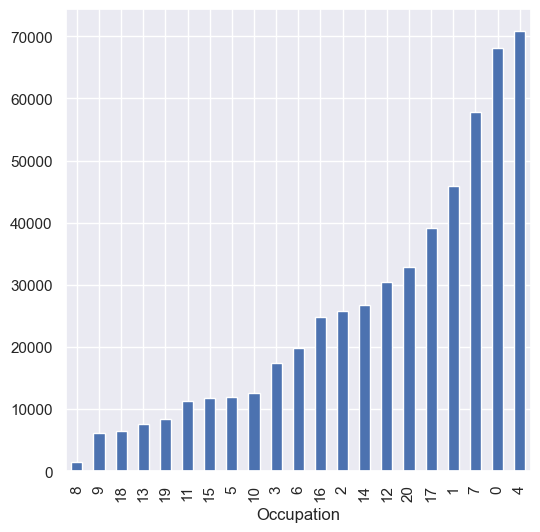

In [68]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation'>

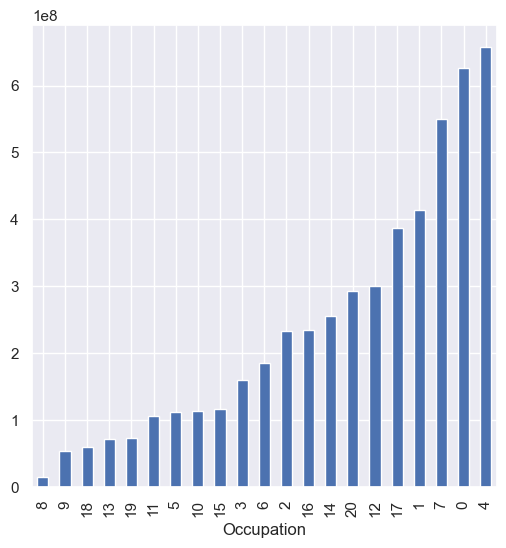

In [69]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

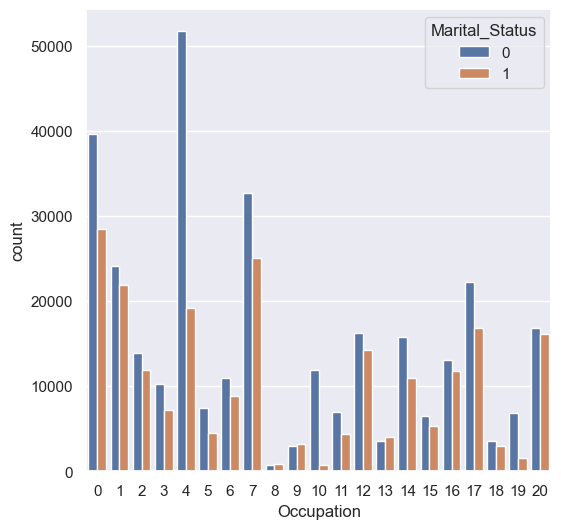

In [74]:
sns.countplot(x = 'Occupation', hue = 'Marital_Status', data = df)

<Axes: xlabel='Occupation', ylabel='count'>

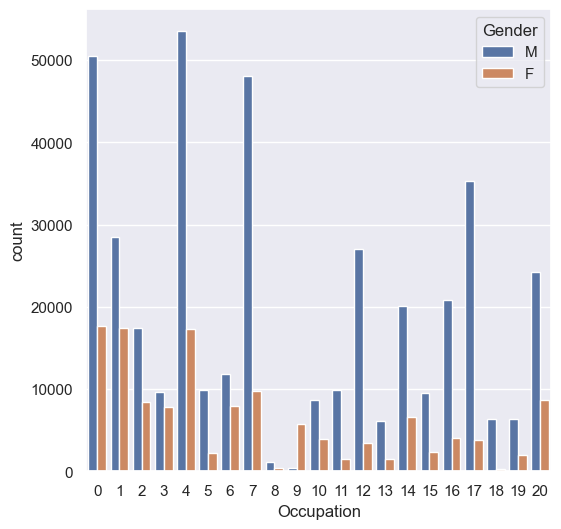

In [75]:
sns.countplot(x = 'Occupation', hue = 'Gender', data = df)

<Axes: xlabel='Occupation'>

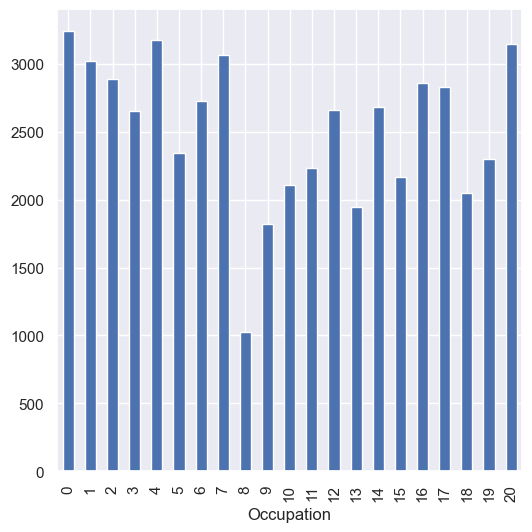

In [76]:
df.groupby('Occupation').nunique()['Product_ID'].plot(kind = 'bar')

<Axes: xlabel='Occupation'>

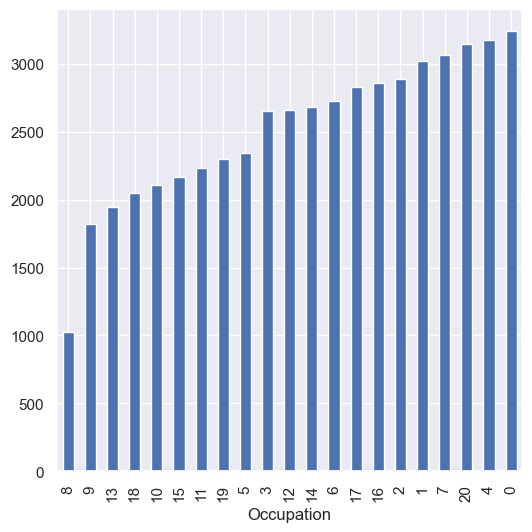

In [77]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

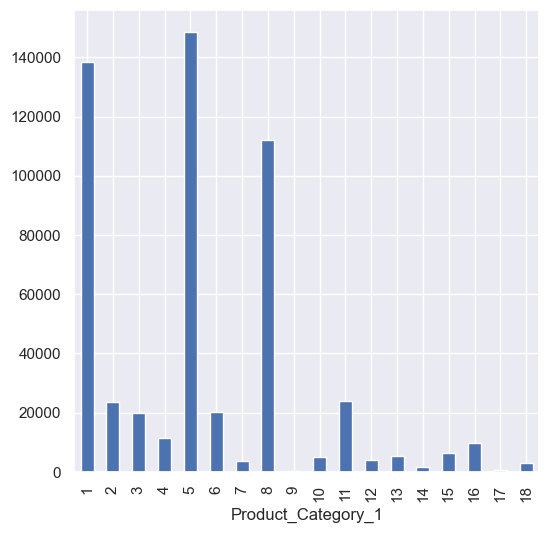

In [78]:
df.groupby('Product_Category_1').size().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

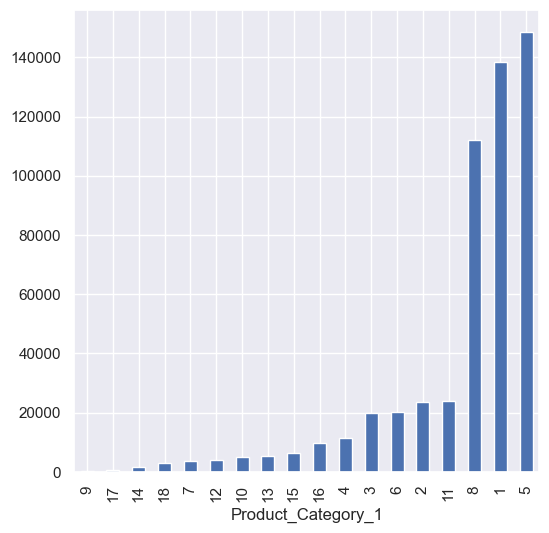

In [79]:
df.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_ID'>

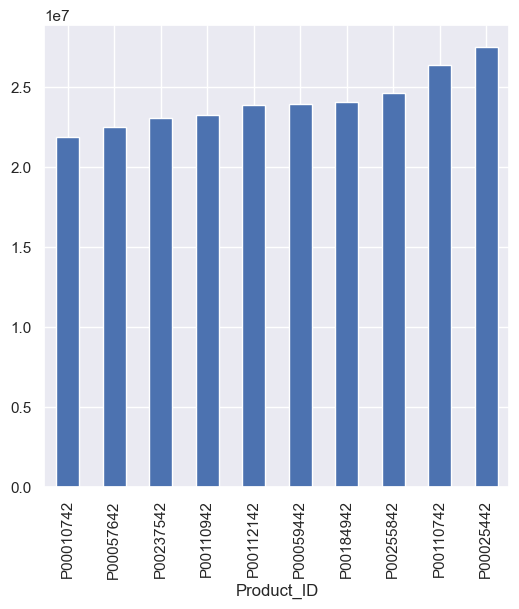

In [80]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_ID'>

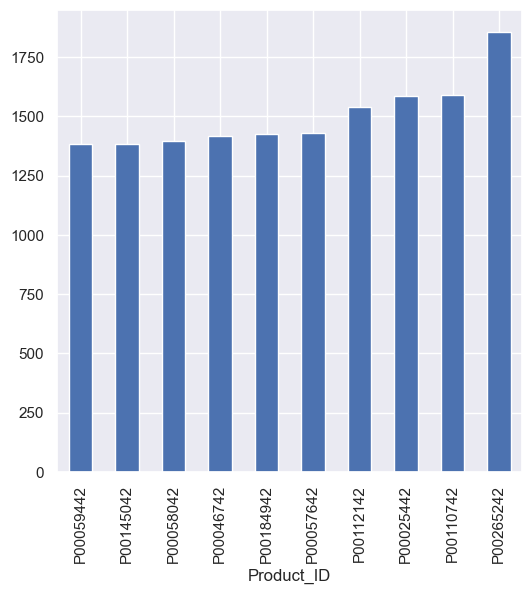

In [81]:
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1', ylabel='count'>

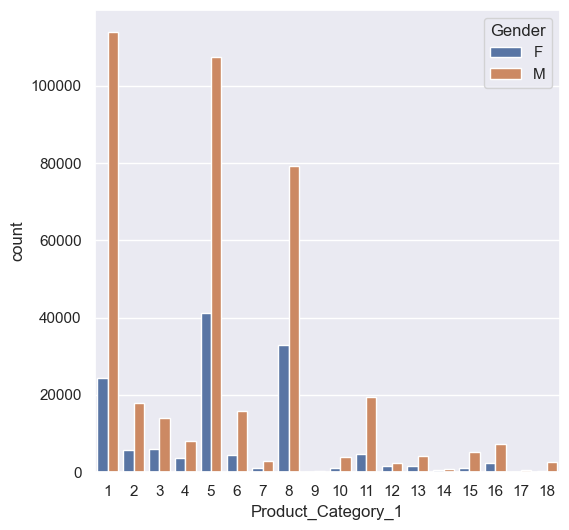

In [83]:
sns.countplot(x = 'Product_Category_1', hue = 'Gender', data = df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

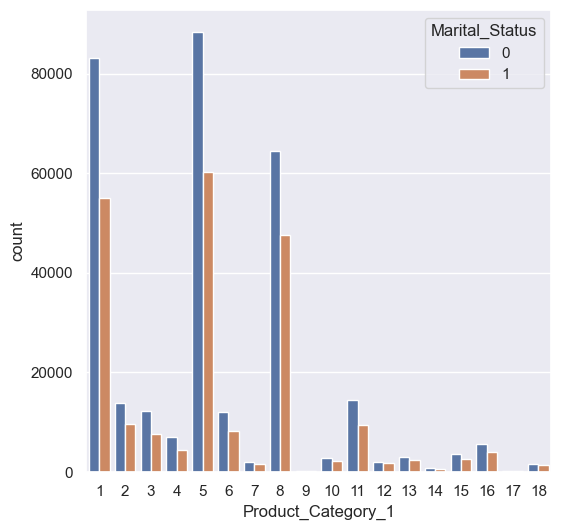

In [84]:
sns.countplot(x = 'Product_Category_1', hue = 'Marital_Status', data = df)

# Combining Age & Marital Status

In [85]:
l = []
for i in range(len(df)):
    l.append(df['Gender'][i] +"_"+ str(df['Marital_Status'][i]))

df['MaritalGender'] = l

<Axes: xlabel='MaritalGender', ylabel='count'>

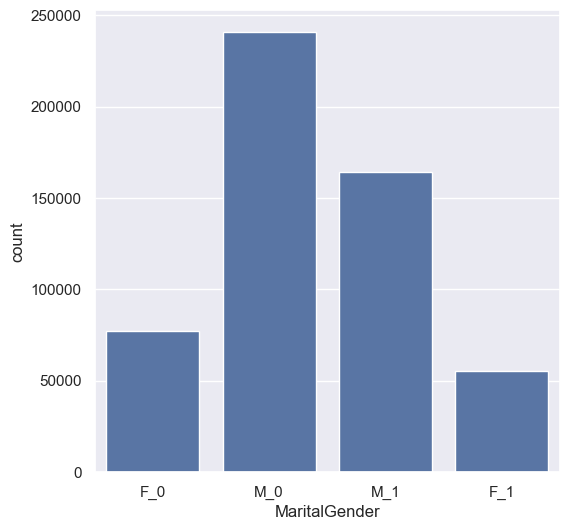

In [86]:
sns.countplot(x = df['MaritalGender'])

<Axes: xlabel='Age', ylabel='count'>

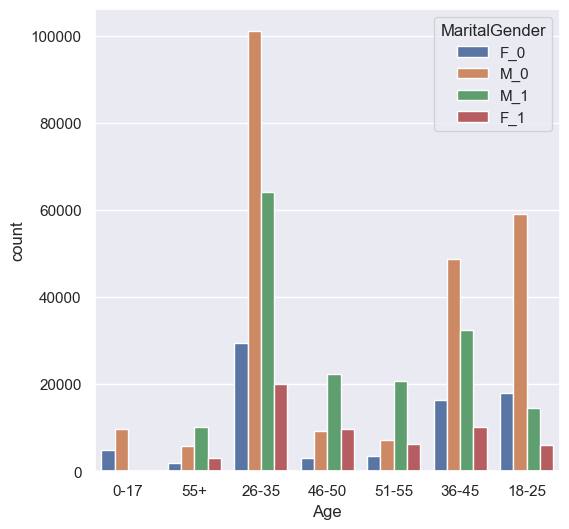

In [87]:
sns.countplot(x = df['Age'], hue = df['MaritalGender'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

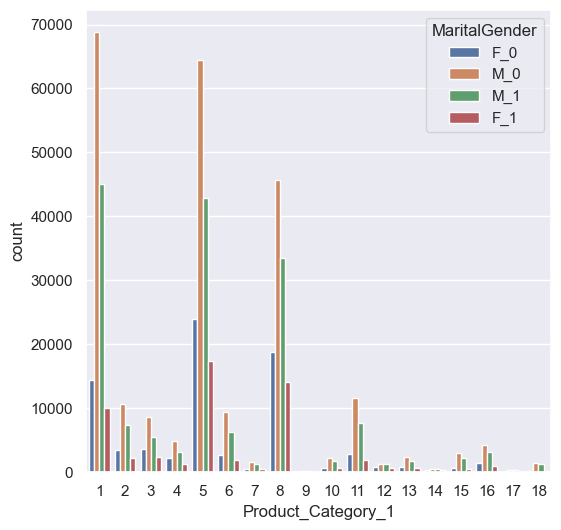

In [88]:
sns.countplot(x = df['Product_Category_1'], hue = df['MaritalGender'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

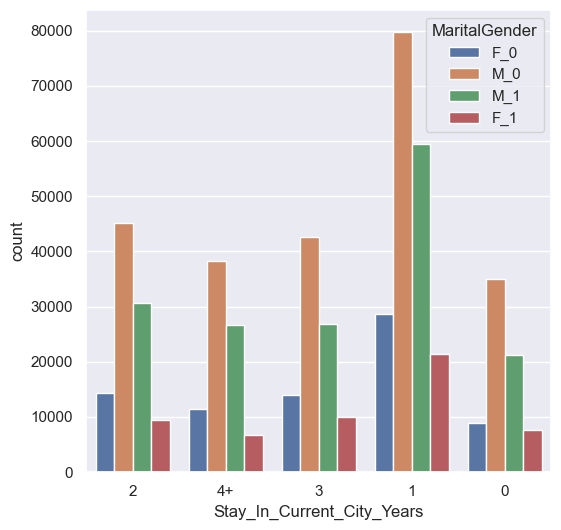

In [89]:
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['MaritalGender'])

<Axes: xlabel='City_Category', ylabel='count'>

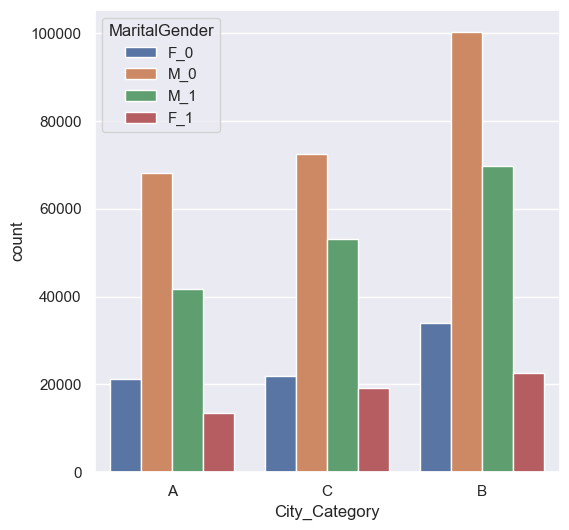

In [90]:
sns.countplot(x = df['City_Category'], hue = df['MaritalGender'])